# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Three Observable Trends:
#### 1. The higher the latitude, the lower the maximum temperature. The highest temperatures cluster around a latitude of zero.
#### 2. As latitudes increase, humidity also seems to increase, although the correlation is low.
#### 3. Wind speed, cloudiness, and humidity don't seem to be strongly correlated with latitude. Temperatures have the strongest correlation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define base API url
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Set parameters
params = {'q':'atlanta',
          'units':'imperial',
          'appid':weather_api_key}

# Initiate lists
city_names = []
clouds = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []

# Begin analysis
print('Beginning Data Retrieval\n-----------------------------')

# Loop through cities and call API to pull data
for i in range(len(cities)):
    params['q'] = cities[i]
    jason = requests.get(url, params=params).json()
    try:
        city_names.append(jason['name'])
        clouds.append(jason['clouds']['all'])
        country.append(jason['sys']['country'])
        date.append(jason['dt'])
        humid.append(jason['main']['humidity'])
        lat.append(jason['coord']['lat'])
        lng.append(jason['coord']['lon'])
        max_temp.append(jason['main']['temp_max'])
        wind.append(jason['wind']['speed'])
        print(f'Processing City #{i}: {cities[i]}')
    except KeyError:
        print(f'Processing City #{i}: City not found. Skipping...')
    time.sleep(1)

print('-----------------------------\nData Retrieval Complete\n-----------------------------')
    

Beginning Data Retrieval
-----------------------------
Processing City #0: nikolskoye
Processing City #1: ozinki
Processing City #2: rikitea
Processing City #3: vaini
Processing City #4: talnakh
Processing City #5: meulaboh
Processing City #6: tuktoyaktuk
Processing City #7: bonavista
Processing City #8: teknaf
Processing City #9: zhezkazgan
Processing City #10: City not found. Skipping...
Processing City #11: heihe
Processing City #12: bredasdorp
Processing City #13: kabin buri
Processing City #14: loreto
Processing City #15: hamilton
Processing City #16: hithadhoo
Processing City #17: georgetown
Processing City #18: new norfolk
Processing City #19: hobart
Processing City #20: City not found. Skipping...
Processing City #21: isangel
Processing City #22: lagoa
Processing City #23: mega
Processing City #24: mabaruma
Processing City #25: ushuaia
Processing City #26: City not found. Skipping...
Processing City #27: alepe
Processing City #28: kaitangata
Processing City #29: blackwater
Proc

Processing City #251: bhimunipatnam
Processing City #252: makakilo city
Processing City #253: surab
Processing City #254: bonfim
Processing City #255: mantua
Processing City #256: requena
Processing City #257: pisco
Processing City #258: wamba
Processing City #259: City not found. Skipping...
Processing City #260: tabriz
Processing City #261: esperance
Processing City #262: kollam
Processing City #263: linxia
Processing City #264: mogadishu
Processing City #265: nouadhibou
Processing City #266: san jeronimo
Processing City #267: saldanha
Processing City #268: fayaoue
Processing City #269: ovsyanka
Processing City #270: margate
Processing City #271: maragogi
Processing City #272: City not found. Skipping...
Processing City #273: el sauzal
Processing City #274: chalus
Processing City #275: logrono
Processing City #276: akdepe
Processing City #277: kota belud
Processing City #278: laurel
Processing City #279: City not found. Skipping...
Processing City #280: sao filipe
Processing City #28

Processing City #503: sukumo
Processing City #504: sargatskoye
Processing City #505: anito
Processing City #506: providencia
Processing City #507: coihaique
Processing City #508: mount barker
Processing City #509: staryy nadym
Processing City #510: haimen
Processing City #511: north myrtle beach
Processing City #512: saint-augustin
Processing City #513: lindi
Processing City #514: City not found. Skipping...
Processing City #515: ferme-neuve
Processing City #516: tabuk
Processing City #517: halifax
Processing City #518: victoria
Processing City #519: new glasgow
Processing City #520: beringovskiy
Processing City #521: grass valley
Processing City #522: fort nelson
Processing City #523: tamandare
Processing City #524: ayr
Processing City #525: erdenet
Processing City #526: senno
Processing City #527: den helder
Processing City #528: ornskoldsvik
Processing City #529: kirakira
Processing City #530: milkovo
Processing City #531: plouzane
Processing City #532: lantawan
Processing City #533

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Map the dataframe
df_dict = {'City':city_names,
           'Cloudiness':clouds,
           'Country':country,
           'Date':date,
           'Humidity':humid,
           'Lat':lat,
           'Lng':lng,
           'Max Temp':max_temp,
           'Wind Speed':wind}

# Create dataframe
df = pd.DataFrame(df_dict)

# Export dataframe to CSV
df.to_csv(output_data_file, index=False)

# Display dataframe
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1580270243,92,59.70,30.79,30.20,11.18
1,Ozinki,100,RU,1580270554,91,51.18,49.68,11.95,13.06
2,Rikitea,100,PF,1580270485,78,-23.12,-134.97,79.79,6.22
3,Vaini,75,TO,1580270072,94,-21.20,-175.20,78.80,5.82
4,Talnakh,100,RU,1580270159,78,69.49,88.40,8.60,6.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

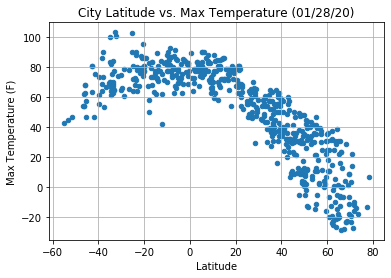

In [6]:
# Get today's date using datetime module
d = datetime.datetime.today()

# Format today's date
today = d.strftime('%m/%d/%y')

# Plot using Pandas dataframe and export to PNG
ax = df.plot(x='Lat', y='Max Temp', kind='scatter', title=f'City Latitude vs. Max Temperature ({today})', grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
plt.savefig('../output_data/lat-temp')

#### Observation: As latitudes increase, maximum temperatures decrease. The highest max temperatures are around a latitude of zero.

#### Latitude vs. Humidity Plot

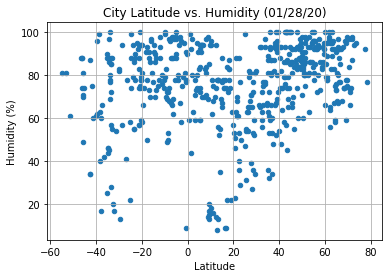

In [7]:
# Plot using Pandas dataframe and export to PNG
ax = df.plot(x='Lat', y='Humidity', kind='scatter', title=f'City Latitude vs. Humidity ({today})', grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
plt.savefig('../output_data/lat-hum')

#### Observation: There does not seem to be much of a visual correlation, but as latitudes increase, humidity tends to increase. In the higher latitudes the points tend to cluster more closely together.

#### Latitude vs. Cloudiness Plot

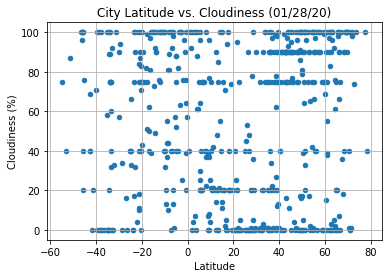

In [8]:
# Plot using Pandas dataframe and export to PNG
ax = df.plot(x='Lat', y='Cloudiness', kind='scatter', title=f'City Latitude vs. Cloudiness ({today})', grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
plt.savefig('../output_data/lat-cloud')

#### Observation: Visually, there does not seem to be any correlation. There seem to be many data points in line at various temperatures.

#### Latitude vs. Wind Speed Plot

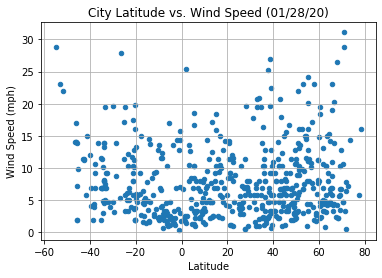

In [9]:
# Plot using Pandas dataframe and export to PNG
ax = df.plot(x='Lat', y='Wind Speed', kind='scatter', title=f'City Latitude vs. Wind Speed ({today})', grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
plt.savefig('../output_data/lat-wind')

#### Observation: Visually there does not seem to be a correlation, with the exception of a few outliers at the higher latitudes.

## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df.loc[df['Lat'] >= 0]
df_south = df.loc[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7769298499443698


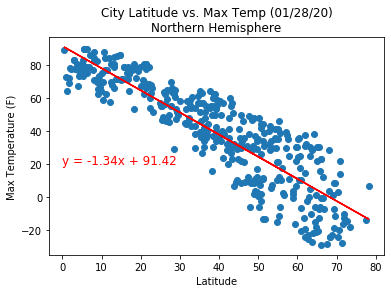

In [11]:
# Set regression variables
x = df_north['Lat']
y = df_north['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate regress values
regress_values = slope * x + intercept

# Define equation
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

# Print r-squared
print(f'The r-squared is: {rvalue**2}')

# Plot scatter and regression line
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (0, 20), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temp ({today})\nNorthern Hemisphere')
plt.savefig('../output_data/lat-temp-n')

#### Observation: This linear regression is modeling latitudes in the northern hemisphere versus maximum temperatures. Based on the r-squared, there is a clear strong correlation. As latitudes increase, maximum temperatures decrease. The highest max temperatures are around a latitude of zero.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.16484402616199834


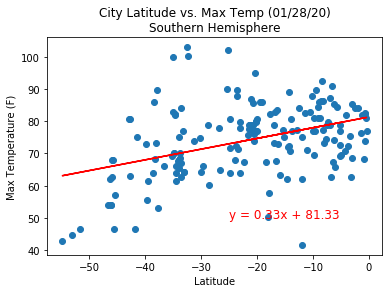

In [12]:
x = df_south['Lat']
y = df_south['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (-25, 50), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temp ({today})\nSouthern Hemisphere')
plt.savefig('../output_data/lat-temp-s')

#### Observation: This linear regression is modeling latitudes in the southern hemisphere versus maximum temperatures. Based on the r-squared, there seems to be a slight correlation. As latitudes approach zero, maximum temperatures tend to increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1455220502597754


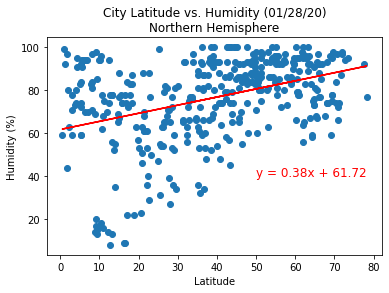

In [13]:
x = df_north['Lat']
y = df_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (50, 40), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})\nNorthern Hemisphere')
plt.savefig('../output_data/lat-hum-n')

#### Observation: This linear regression is modeling latitudes in the northern hemisphere versus humidity. Based on the r-squared, there is a low correlation. As latitudes increase, humidity tends to increase.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07432665959698963


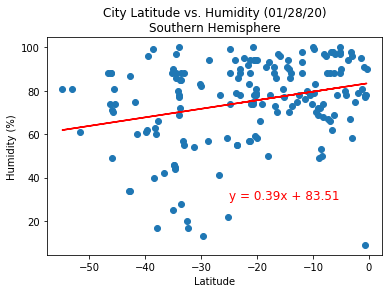

In [14]:
x = df_south['Lat']
y = df_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (-25, 30), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})\nSouthern Hemisphere')
plt.savefig('../output_data/lat-hum-s')

#### Observation: This linear regression is modeling latitudes in the southern hemisphere versus humidity. Based on the r-squared, there is a low correlation. As latitudes approach zero, humidity tends to increase.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05987652742306785


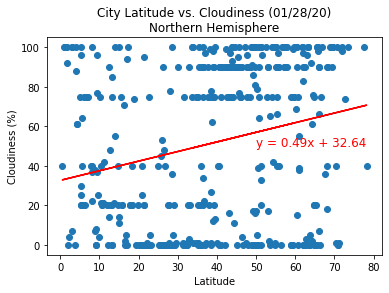

In [15]:
x = df_north['Lat']
y = df_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (50, 50), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})\nNorthern Hemisphere')
plt.savefig('../output_data/lat-cloud-n')

#### Observation: This linear regression is modeling latitudes in the northern hemisphere versus cloudiness.  Visually, there does not seem to be a correlation, but based on the r-squared there is a low correlation. As latitudes increase, cloudiness tends to increase.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0245753935318534


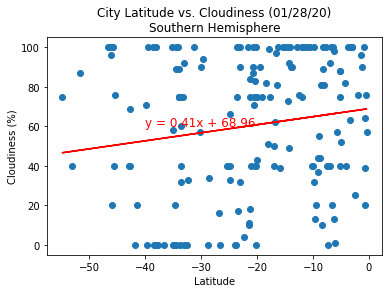

In [16]:
x = df_south['Lat']
y = df_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (-40, 60), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})\nSouthern Hemisphere')
plt.savefig('../output_data/lat-cloud-s')

#### Observation: This linear regression is modeling latitudes in the southern hemisphere versus cloudiness.  Based on the r-squared there is a low correlation. As latitudes approach zero, cloudiness tends to increase.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020055149267544026


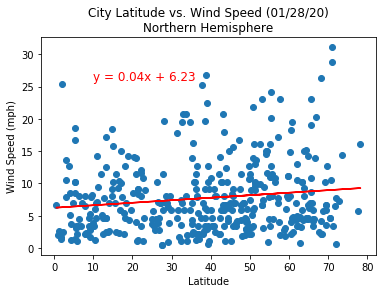

In [17]:
x = df_north['Lat']
y = df_north['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (10, 26), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today})\nNorthern Hemisphere')
plt.savefig('../output_data/lat-wind-n')

#### Observation: This linear regression is modeling latitudes in the northern hemisphere versus wind speed.  Visually, there does not seem to be a correlation. Based on the r-squared there is almost no correlation. As latitudes increase, wind speed increases very slightly.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14730478452054105


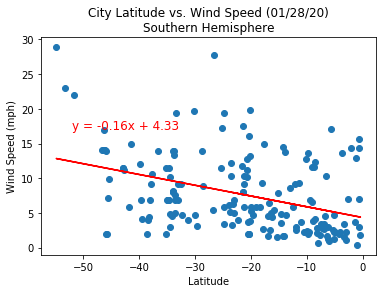

In [18]:
x = df_south['Lat']
y = df_south['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = slope * x + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-squared is: {rvalue**2}')

plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(equation, (-52, 17), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today})\nSouthern Hemisphere')
plt.savefig('../output_data/lat-wind-s')

#### Observation: This linear regression is modeling latitudes in the southern hemisphere versus windspeed.  Visually, there seems to be a slight correlation, and based on the r-squared there is a low correlation. As latitudes increase, wind speed decreases slightly.